In [1]:
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.MNIST(root = 'data', train= True, transform = ToTensor(), download=True )
test_data = datasets.MNIST(root = 'data', train= False, transform = ToTensor(), download=True )

100%|██████████| 9.91M/9.91M [00:00<00:00, 52.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.51MB/s]


In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [7]:
train_data.targets.shape
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7a5d5850bc10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7a5d585f03d0>}

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()

      self.conv1 = nn.Conv2d(1,10, kernel_size=5)
      self.conv2 = nn.Conv2d(10,20, kernel_size=5)
      self.conv2_drop = nn.Dropout2d()
      self.fc1 = nn.Linear(320,50)
      self.fc2 = nn.Linear(50,10)

    def  forward(self,x):
      x = F.relu(F.max_pool2d(self.conv1(x),2))
      x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
      x = x.view(-1,320)
      x = F.relu(self.fc1(x))
      x = F.dropout(x,training = self.training)
      x = self.fc2(x)

      return F.softmax(x)

In [15]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
        print(f'Train Epoch: {epoch} [{batch_idx *len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

In [23]:
def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data , target in loaders['test']:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += loss_fn(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\n test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

In [24]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-11-53a5a06442bf>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	1.489221
Train Epoch: 1 [2000/60000 (3%)]	1.511416
Train Epoch: 1 [4000/60000 (7%)]	1.519009
Train Epoch: 1 [6000/60000 (10%)]	1.506425
Train Epoch: 1 [8000/60000 (13%)]	1.479335
Train Epoch: 1 [10000/60000 (17%)]	1.489176
Train Epoch: 1 [12000/60000 (20%)]	1.494645
Train Epoch: 1 [14000/60000 (23%)]	1.514227
Train Epoch: 1 [16000/60000 (27%)]	1.525004
Train Epoch: 1 [18000/60000 (30%)]	1.515884
Train Epoch: 1 [20000/60000 (33%)]	1.550733
Train Epoch: 1 [22000/60000 (37%)]	1.527429
Train Epoch: 1 [24000/60000 (40%)]	1.517345
Train Epoch: 1 [26000/60000 (43%)]	1.493687
Train Epoch: 1 [28000/60000 (47%)]	1.486153
Train Epoch: 1 [30000/60000 (50%)]	1.512138
Train Epoch: 1 [32000/60000 (53%)]	1.480635
Train Epoch: 1 [34000/60000 (57%)]	1.521042
Train Epoch: 1 [36000/60000 (60%)]	1.534825
Train Epoch: 1 [38000/60000 (63%)]	1.500724
Train Epoch: 1 [40000/60000 (67%)]	1.519271
Train Epoch: 1 [42000/60000 (70%)]	1.551141
Train Epoch: 1 [44000/60000 (73%)]	1.493695

Prediction: 9


<ipython-input-11-53a5a06442bf>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


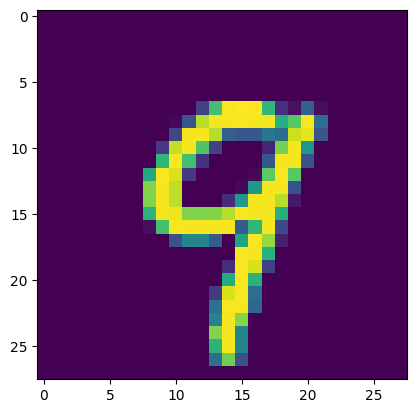

In [21]:
import matplotlib.pyplot as plt
model.eval()

data, target = test_data[12]

data = data.unsqueeze(0).to(device)

output = model(data)

pred = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {pred}')

image = data.unsqueeze(0).cpu().numpy()

plt.imshow(image.squeeze())
plt.show()